In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np
import pandas as pd
import pickle
from scipy.signal import find_peaks
import seaborn as sns

plt.rcParams['font.size'] = 16

In [2]:
def rdf_axis(ax, xmin=1, xmax=8, xticks=(1,0.2), ymin=0, ymax=8, yticks=(1,0.2)):
    ax.axhline(1, ls='dashed', c='k', lw=1, alpha=0.5)
    ax.set_xticks(np.arange(50, step=xticks[0]))
    ax.set_xticks(np.arange(50, step=xticks[1]), minor=True)
    ax.set_yticks(np.arange(50, step=yticks[0]))
    ax.set_yticks(np.arange(50, step=yticks[1]), minor=True)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel('r ($\mathrm{\AA}$)')
    ax.set_ylabel('g(r)')
    
    return ax


def load_object(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)


def prep_polyhedron_df(file_Na, file_Cl):
    poly_Na = load_object(file_Na)
    poly_Cl = load_object(file_Cl)

    tmp1 = pd.DataFrame()
    tmp1['ion'] = ['Na']*poly_Na.areas.flatten().shape[0]
    tmp1['area'] = poly_Na.areas.flatten()

    tmp2 = pd.DataFrame()
    tmp2['ion'] = ['Cl']*poly_Cl.areas.flatten().shape[0]
    tmp2['area'] = poly_Cl.areas.flatten()

    df = pd.concat((tmp1, tmp2)).reset_index(drop=True)
    return df


def polyhedron_df(file):
    poly = load_object(file)

    df = pd.DataFrame()
    df['area'] = poly.areas.flatten()
    df['volume'] = poly.volumes.flatten()

    return df

In [3]:
pressure_colors = {
    '1 bar'   : '#0072B2',  # Blue
    '150 bar' : '#D55E00',  # Reddish Orange
}

concentration_colors = {
    'dilute' : '#0072B2', # Blue
    '0.2 M'  : '#D55E00',  # Reddish Orange
    '0.6 M'  : '#E69F00',  # Orange
    '1.8 M'  : '#009E73'  # Green
}

ion_colors = {
    'Li' : '#CC80FF', # Light Purple
    'Na' : '#AB5CF2', # Violet
    'K'  : '#8F40D4', # Dark Violet
    'Rb' : '#702EB0', # Deep Purple
    'Mg' : '#8AFF00', # Lime Green
    'Ca' : '#3DFF00', # Bright Green
    'Sr' : '#00FF00', # Green
    'F'  : '#9B30FF', # Purple
    'Cl' : '#00FF00', # Green, Cl
    'Br' : '#A52A2A'  # Brown, Br
}


In [4]:
figs_path = '../../figures/'
si_figs_path = '../../SI_figures/'

In [5]:
!head ./NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat

# r (Angstroms), cation-water g(r), anion-water g(r), water-water g(r), cation-anion g(r)
2.500000000000000139e-02 0.000000000000000000e+00 0.000000000000000000e+00 5.748945472920250904e+04 0.000000000000000000e+00
7.500000000000001110e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
1.250000000000000000e-01 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
1.750000000000000167e-01 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
2.250000000000000056e-01 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
2.750000000000000222e-01 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
3.250000000000000666e-01 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00
3.750000000000000000e-01 0.00000000

#### Na-water and Cl-water RDFs, standard MD, 1 bar, infinite dilution

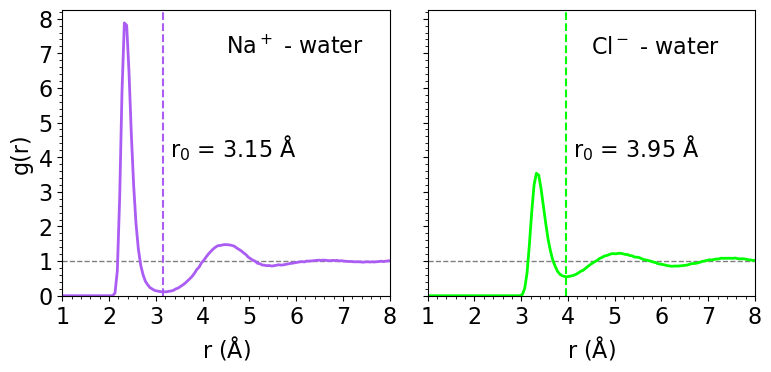

In [6]:
file = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat'
rdfs = np.loadtxt(file)

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
ax[0] = rdf_axis(ax[0])
ax[0].plot(rdfs[:,0], rdfs[:,1], label='Na$^+$ - water', color=ion_colors['Na'], lw=2)
ax[0].axvline(3.15, ls='dashed', c=ion_colors['Na'])
ax[0].text(3.3, 4, 'r$_0$ = 3.15 $\mathrm{\AA}$')
ax[0].text(4.5, 7, 'Na$^+$ - water')

ax[1] = rdf_axis(ax[1], ymax=8.25)
ax[1].plot(rdfs[:,0], rdfs[:,2], label='Cl$^-$ - water', color=ion_colors['Cl'], lw=2)
ax[1].axvline(3.95, ls='dashed', c=ion_colors['Cl'])
ax[1].text(4.1, 4, 'r$_0$ = 3.95 $\mathrm{\AA}$')
ax[1].text(4.5, 7, 'Cl$^-$ - water')

ax[1].set_ylabel(None)
plt.tight_layout()
plt.savefig(figs_path+'rdf_NaCl_hydration_radius.pdf')

#### Na-water and Cl-water RDFs, standard MD, all pressures, infinite dilution

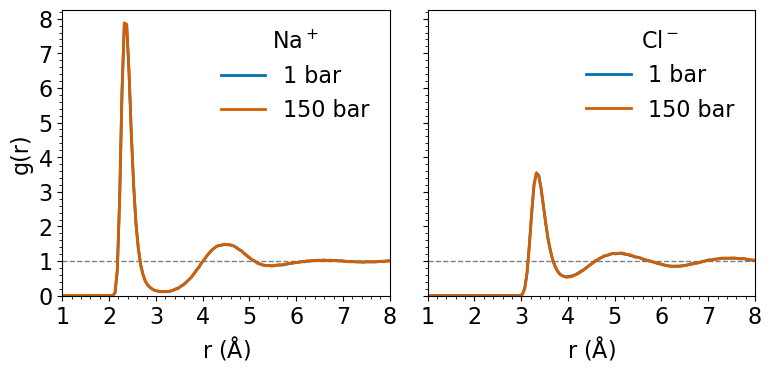

In [7]:
file_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat'
rdfs_1bar = np.loadtxt(file_1bar)

file_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/rdfs.dat'
rdfs_150bar = np.loadtxt(file_150bar)

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
ax[0] = rdf_axis(ax[0], ymax=8.25)
ax[0].plot(rdfs_1bar[:,0], rdfs_1bar[:,1], label='1 bar', color=pressure_colors['1 bar'], lw=2, ls='solid')
ax[0].plot(rdfs_150bar[:,0], rdfs_150bar[:,1], label='150 bar', color=pressure_colors['150 bar'], lw=2, ls='solid')
ax[0].legend(title='Na$^+$', frameon=False)

ax[1] = rdf_axis(ax[1], ymax=8.25)
ax[1].plot(rdfs_1bar[:,0], rdfs_1bar[:,2], label='1 bar', color=pressure_colors['1 bar'], lw=2, ls='solid')
ax[1].plot(rdfs_150bar[:,0], rdfs_150bar[:,2], label='150 bar', color=pressure_colors['150 bar'], lw=2, ls='solid')
ax[1].legend(title='Cl$^-$', frameon=False)
ax[1].set_ylabel(None)

plt.tight_layout()
plt.savefig(figs_path+'rdf_NaCl_pressure.pdf')

#### Na and Cl shell area, standard MD, all pressures, infinite dilution

/Users/nate_schwindt/anaconda3/envs/mda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


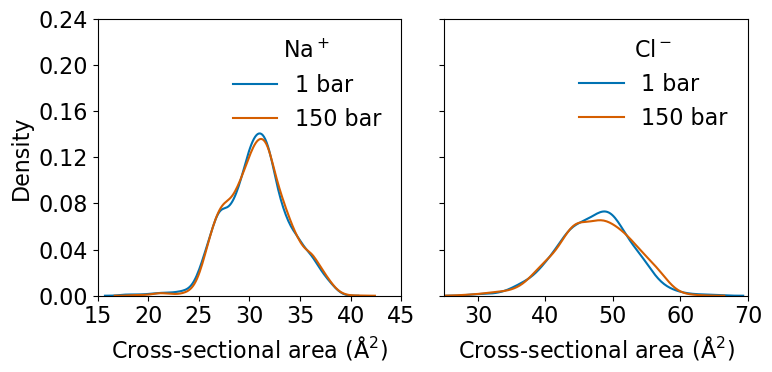

In [8]:
file_Na_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/polyhedrons_Na.pl'
file_Cl_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/polyhedrons_Cl.pl'
df_1bar = prep_polyhedron_df(file_Na_1bar, file_Cl_1bar)

file_Na_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/polyhedrons_Na.pl'
file_Cl_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/polyhedrons_Cl.pl'
df_150bar = prep_polyhedron_df(file_Na_150bar, file_Cl_150bar)

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)
sns.kdeplot(df_1bar[df_1bar.ion == 'Na'], x='area', ax=ax[0], label='1 bar', color=pressure_colors['1 bar'])
sns.kdeplot(df_150bar[df_150bar.ion == 'Na'], x='area', ax=ax[0], label='150 bar', color=pressure_colors['150 bar'])
ax[0].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[0].set_xticks(np.arange(100,step=5))
ax[0].set_xlim(15,45)
ax[0].set_yticks(np.arange(0.5,step=0.04))
ax[0].set_ylim(0,0.24)
ax[0].legend(frameon=False, title='Na$^+$')

sns.kdeplot(df_1bar[df_1bar.ion == 'Cl'], x='area', ax=ax[1], label='1 bar', color=pressure_colors['1 bar'])
sns.kdeplot(df_150bar[df_150bar.ion == 'Cl'], x='area', ax=ax[1], label='150 bar', color=pressure_colors['150 bar'])
ax[1].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1].set_xticks(np.arange(100,step=10))
ax[1].set_xlim(25,70)
ax[1].legend(frameon=False, title='Cl$^-$')

plt.tight_layout()
plt.savefig(figs_path+'area_dist_NaCl_pressure.pdf')

#### Combined RDFs and area distributions, comparing pressure

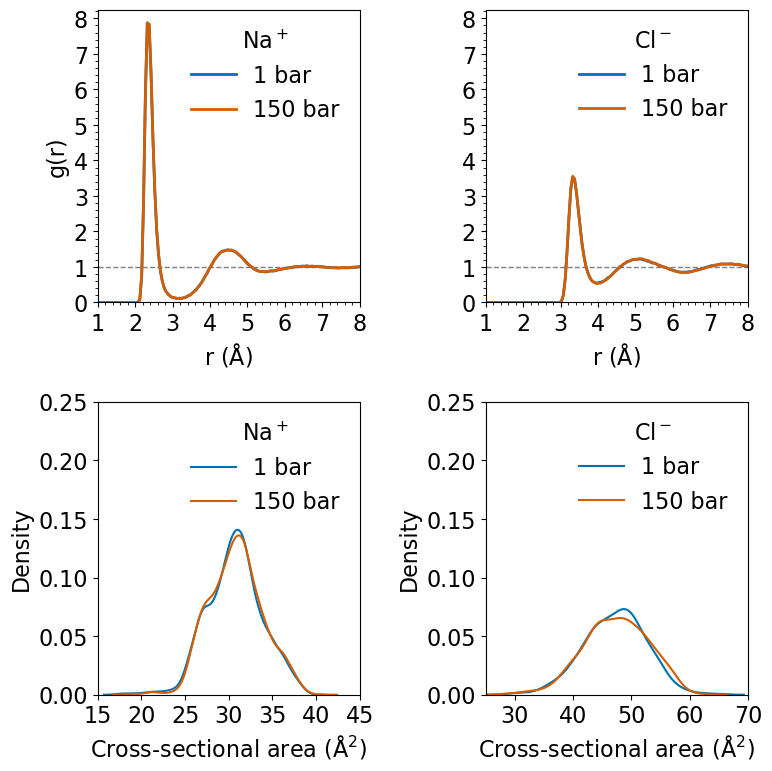

In [9]:
file_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat'
rdfs_1bar = np.loadtxt(file_1bar)

file_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/rdfs.dat'
rdfs_150bar = np.loadtxt(file_150bar)

fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0] = rdf_axis(ax[0,0], ymax=8.25)
ax[0,0].plot(rdfs_1bar[:,0], rdfs_1bar[:,1], label='1 bar', color=pressure_colors['1 bar'], lw=2, ls='solid')
ax[0,0].plot(rdfs_150bar[:,0], rdfs_150bar[:,1], label='150 bar', color=pressure_colors['150 bar'], lw=2, ls='solid')
ax[0,0].legend(title='Na$^+$', frameon=False)

ax[0,1] = rdf_axis(ax[0,1], ymax=8.25)
ax[0,1].plot(rdfs_1bar[:,0], rdfs_1bar[:,2], label='1 bar', color=pressure_colors['1 bar'], lw=2, ls='solid')
ax[0,1].plot(rdfs_150bar[:,0], rdfs_150bar[:,2], label='150 bar', color=pressure_colors['150 bar'], lw=2, ls='solid')
ax[0,1].legend(title='Cl$^-$', frameon=False)
ax[0,1].set_ylabel(None)

file_Na_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/polyhedrons_Na.pl'
file_Cl_1bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/polyhedrons_Cl.pl'
df_1bar = prep_polyhedron_df(file_Na_1bar, file_Cl_1bar)

file_Na_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/polyhedrons_Na.pl'
file_Cl_150bar = './NaCl/OPC3/Sengupta_etal/Cdilute/P150bar/polyhedrons_Cl.pl'
df_150bar = prep_polyhedron_df(file_Na_150bar, file_Cl_150bar)

sns.kdeplot(df_1bar[df_1bar.ion == 'Na'], x='area', ax=ax[1,0], label='1 bar', color=pressure_colors['1 bar'])
sns.kdeplot(df_150bar[df_150bar.ion == 'Na'], x='area', ax=ax[1,0], label='150 bar', color=pressure_colors['150 bar'])
ax[1,0].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1,0].set_xticks(np.arange(100,step=5))
ax[1,0].set_xlim(15,45)
ax[1,0].set_yticks(np.arange(0.5,step=0.05))
ax[1,0].set_ylim(0,0.25)
ax[1,0].legend(frameon=False, title='Na$^+$')

sns.kdeplot(df_1bar[df_1bar.ion == 'Cl'], x='area', ax=ax[1,1], label='1 bar', color=pressure_colors['1 bar'])
sns.kdeplot(df_150bar[df_150bar.ion == 'Cl'], x='area', ax=ax[1,1], label='150 bar', color=pressure_colors['150 bar'])
ax[1,1].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1,1].set_xticks(np.arange(100,step=10))
ax[1,1].set_xlim(25,70)
ax[1,1].set_yticks(np.arange(0.5,step=0.05))
ax[1,1].set_ylim(0,0.25)
ax[1,1].legend(frameon=False, title='Cl$^-$')

plt.tight_layout()
plt.savefig(figs_path+'rdf_area_dist_NaCl_pressure.pdf')

#### Many ions comparing pressures

For Li:
	1 bar -- IOD: 1.9750	 Peak height:13.4979
	150 bar -- IOD: 1.9750	 Peak height:13.3642
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:-0.1337
For Na:
	1 bar -- IOD: 2.3250	 Peak height:7.8772
	150 bar -- IOD: 2.3250	 Peak height:7.8672
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:-0.0100
For K:
	1 bar -- IOD: 2.7250	 Peak height:5.0489
	150 bar -- IOD: 2.7250	 Peak height:5.0048
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:-0.0442
For Rb:
	1 bar -- IOD: 2.8750	 Peak height:4.3089
	150 bar -- IOD: 2.8750	 Peak height:4.2717
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:-0.0371
For Mg:
	1 bar -- IOD: 1.9750	 Peak height:23.3606
	150 bar -- IOD: 1.9750	 Peak height:23.3746
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:0.0140
For Ca:
	1 bar -- IOD: 2.3250	 Peak height:14.9742
	150 bar -- IOD: 2.3250	 Peak height:14.8545
	Difference (150 bar - 1 bar) -- IOD: 0.0000	 Peak height:-0.1196
For Sr:
	1 bar -- IOD: 2.5250	 Peak 

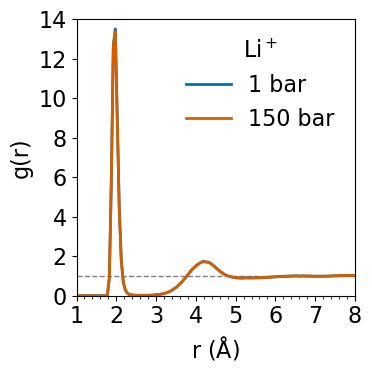

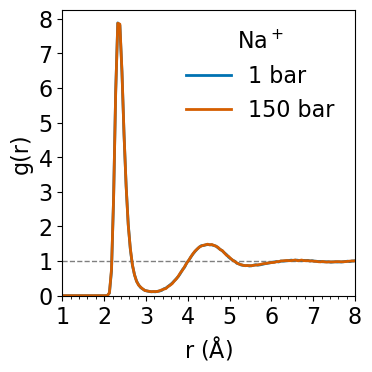

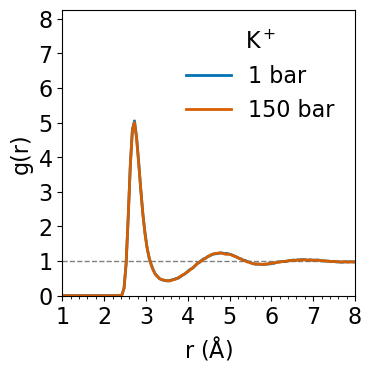

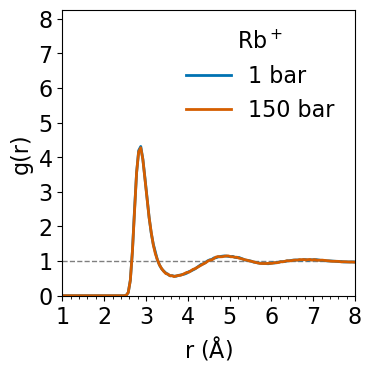

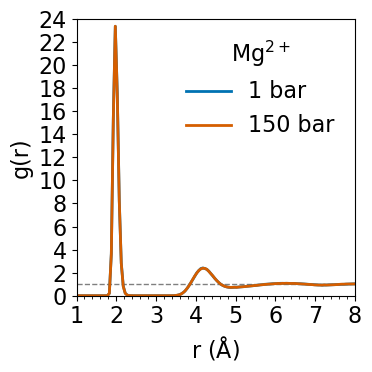

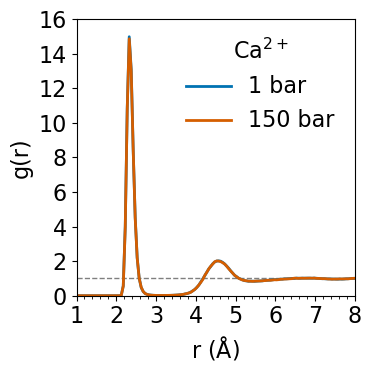

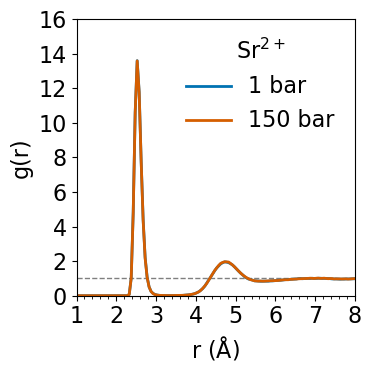

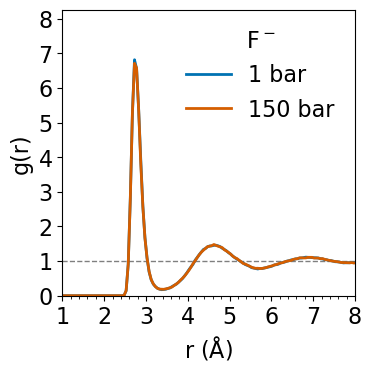

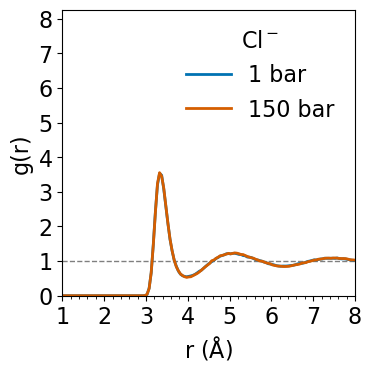

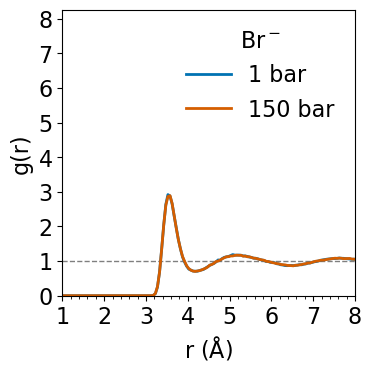

In [10]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/Cdilute/',
    './NaCl/OPC3/Sengupta_etal/Cdilute/',
    './KCl/OPC3/Sengupta_etal/Cdilute/',
    './RbCl/OPC3/Sengupta_etal/Cdilute/',
    './MgCl2/OPC3/Li2020/Cdilute/',
    './CaCl2/OPC3/Li2020/Cdilute/',
    './SrCl2/OPC3/Li2020/Cdilute/',
    './NaF/OPC3/Sengupta_etal/Cdilute/',
    './NaCl/OPC3/Sengupta_etal/Cdilute/',
    './NaBr/OPC3/Sengupta_etal/Cdilute/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']

for i,path in enumerate(ion_paths):

    file_1bar = path+'P1bar/rdfs.dat'
    rdfs_1bar = np.loadtxt(file_1bar)

    file_150bar = path+'P150bar/rdfs.dat'
    rdfs_150bar = np.loadtxt(file_150bar)

    if 'LiCl' in path:
        ymax = 14
        yticks = (2,100)
    elif 'MgCl2' in path:
        ymax = 24
        yticks = (2,100)
    elif 'CaCl2' in path or 'SrCl2' in path:
        ymax = 16
        yticks = (2,100)
    else:
        ymax = 8.25
        yticks = (1,100)

    if i > 6:
        r = 2
    else:
        r = 1

    fig, ax = plt.subplots(1,1, figsize=(4,4))
    ax = rdf_axis(ax, ymax=ymax, yticks=yticks)
    ax.plot(rdfs_1bar[:,0], rdfs_1bar[:,r], label='1 bar', color=pressure_colors['1 bar'], lw=2, ls='solid')
    ax.plot(rdfs_150bar[:,0], rdfs_150bar[:,r], label='150 bar', color=pressure_colors['150 bar'], lw=2, ls='solid')
    ax.legend(title=labels[i], frameon=False)

    ion = labels[i].split('$')[0]
    plt.tight_layout()
    iod_idx_1bar = rdfs_1bar[:,r].argmax()
    iod_idx_150bar = rdfs_150bar[:,r].argmax()
    print(f'For {ion}:')
    print(f'\t1 bar -- IOD: {rdfs_1bar[iod_idx_1bar,0]:.4f}\t Peak height:{rdfs_1bar[iod_idx_1bar,r]:.4f}')
    print(f'\t150 bar -- IOD: {rdfs_150bar[iod_idx_150bar,0]:.4f}\t Peak height:{rdfs_150bar[iod_idx_150bar,r]:.4f}')
    print(f'\tDifference (150 bar - 1 bar) -- IOD: {rdfs_150bar[iod_idx_150bar,0] - rdfs_1bar[iod_idx_1bar,0]:.4f}\t Peak height:{rdfs_150bar[iod_idx_150bar,r] - rdfs_1bar[iod_idx_1bar,r]:.4f}')
    # plt.savefig(si_figs_path+f'rdf_{ion}_pressure.pdf')

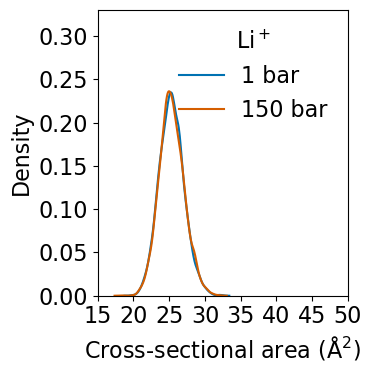

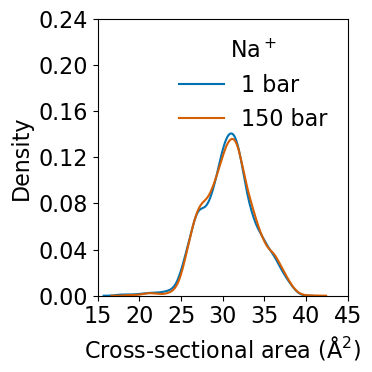

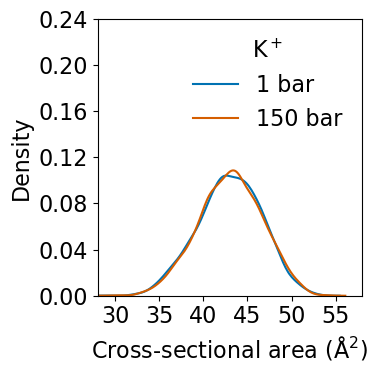

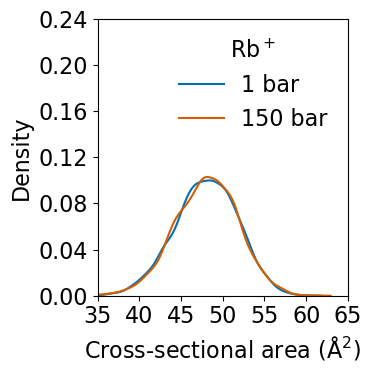

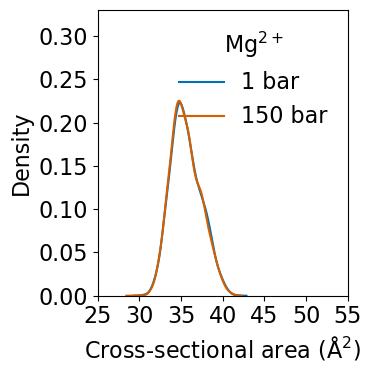

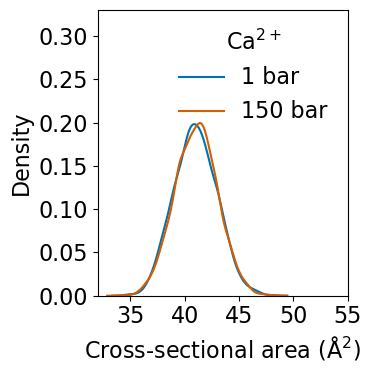

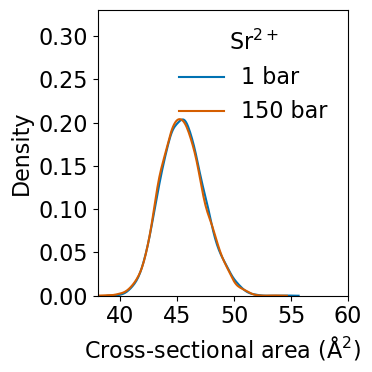

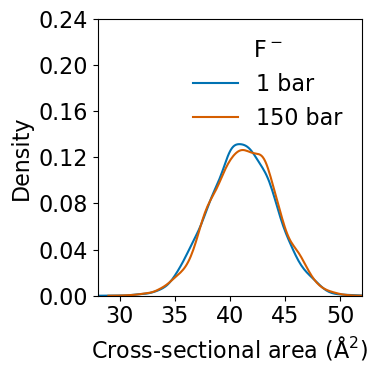

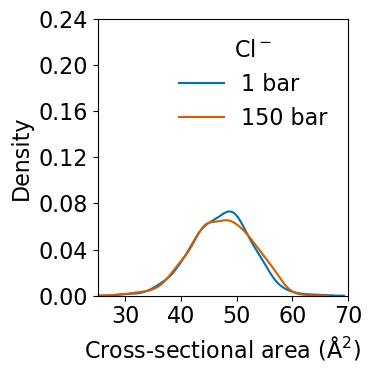

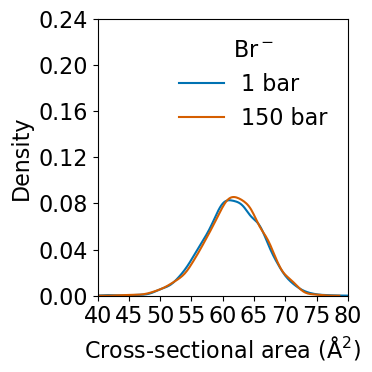

In [11]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/Cdilute/',
    './NaCl/OPC3/Sengupta_etal/Cdilute/',
    './KCl/OPC3/Sengupta_etal/Cdilute/',
    './RbCl/OPC3/Sengupta_etal/Cdilute/',
    './MgCl2/OPC3/Li2020/Cdilute/',
    './CaCl2/OPC3/Li2020/Cdilute/',
    './SrCl2/OPC3/Li2020/Cdilute/',
    './NaF/OPC3/Sengupta_etal/Cdilute/',
    './NaCl/OPC3/Sengupta_etal/Cdilute/',
    './NaBr/OPC3/Sengupta_etal/Cdilute/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']
ranges = [(15,50), (15,45), (28,58), (35,65),
          (25,55), (32,55), (38,60),
          (28,52), (25,70), (40,80)]

for i,path in enumerate(ion_paths):

    ion = labels[i].split('$')[0]

    if ion in ['Na', 'Cl']:
        add = f'_{ion}'
    else:
        add = ''

    if ion in ['Li', 'Mg', 'Ca', 'Sr']:
        ub = 0.33
        yticks = 0.05
    else:
        ub = 0.24
        yticks = 0.04

    if ion in ['Cl']:
        xticks = 10
    else:
        xticks = 5

    file_1bar = path+f'P1bar/polyhedrons{add}.pl'
    df_1bar = polyhedron_df(file_1bar)

    file_150bar = path+f'P150bar/polyhedrons{add}.pl'
    df_150bar = polyhedron_df(file_150bar)

    fig, ax = plt.subplots(1,1, figsize=(4,4))
    sns.kdeplot(df_1bar, x='area', ax=ax, label='1 bar', color=pressure_colors['1 bar'])
    sns.kdeplot(df_150bar, x='area', ax=ax, label='150 bar', color=pressure_colors['150 bar'])
    ax.set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
    ax.set_xticks(np.arange(100,step=xticks))
    ax.set_xlim(ranges[i])
    ax.set_yticks(np.arange(0.5,step=yticks))
    ax.set_ylim(0,ub)
    ax.legend(frameon=False, title=labels[i], loc='upper right')

    plt.tight_layout()
    plt.savefig(si_figs_path+f'area_dist_{ion}_pressure.pdf')

#### Na-water and Cl-water RDFs, standard MD, 1 bar, all concentrations

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/c7/911byk5d5jl0vp7m92bxn01w0000gn/T/ipykernel_91489/3912871536.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


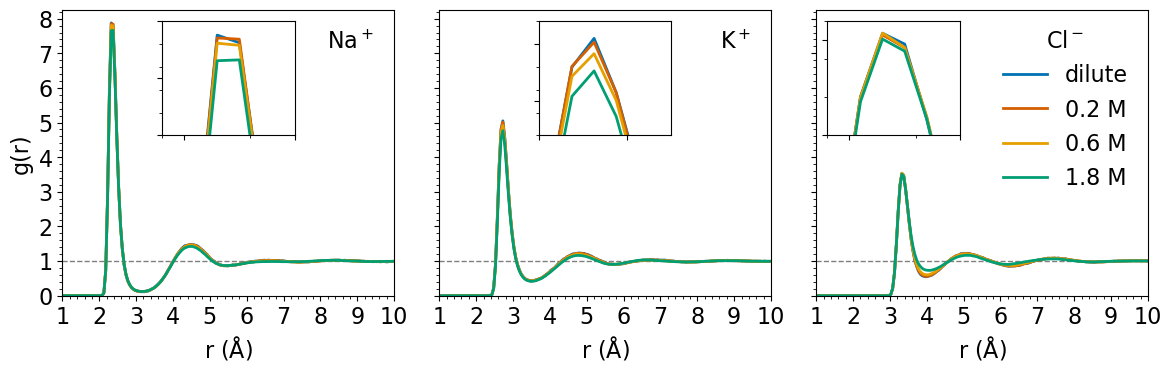

In [12]:
files = [
    './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]
labels = ['dilute', '0.2 M', '0.6 M', '1.8 M']

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

axins = []
for i in range(2):
    ax[i] = rdf_axis(ax[i], ymax=8.25, xmax=10)

    # Create inset of width 30% and height 40% of the parent Axes' bounding box
    # at the lower left corner.
    axins.append(inset_axes(ax[i], width='40%', height='40%', loc='upper center'))
    axins[i].tick_params(labelleft=False, labelbottom=False)
    axins[i].set_xticks(np.arange(50, step=0.2), minor=True)
    axins[i].set_yticks(np.arange(50, step=0.2), minor=True)


ax[2] = rdf_axis(ax[2], ymax=8.25, xmax=10)
# Create inset of width 30% and height 40% of the parent Axes' bounding box
# at the lower left corner.
axins.append(inset_axes(ax[2], width='40%', height='40%', loc='upper left'))
axins[2].tick_params(labelleft=False, labelbottom=False)
axins[2].set_xticks(np.arange(50, step=0.2), minor=True)
axins[2].set_yticks(np.arange(50, step=0.2), minor=True)

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[0].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[0].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[0].set_xlim(2.2,2.5)
    axins[0].set_ylim(7,8)    

    ax[2].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[2].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[2].set_xlim(3.2,3.5)
    axins[2].set_ylim(3,3.6)

ax[0].legend(title='Na$^+$', frameon=False, loc='upper right')
ax[2].legend(title='Cl$^-$', frameon=False, loc='upper right')
ax[2].set_ylabel(None)

files = [
    './KCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[1].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[1].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[1].set_xlim(2.6,2.9)
    axins[1].set_ylim(4.2,5.2)

ax[1].legend(title='K$^+$', frameon=False)
ax[1].set_ylabel(None)

plt.tight_layout()
plt.savefig(figs_path+'rdf_Na_K_Cl_concentration.pdf')

Text(0, 0.5, '')

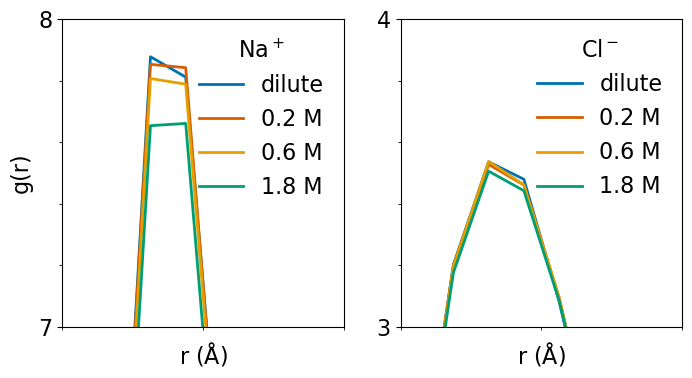

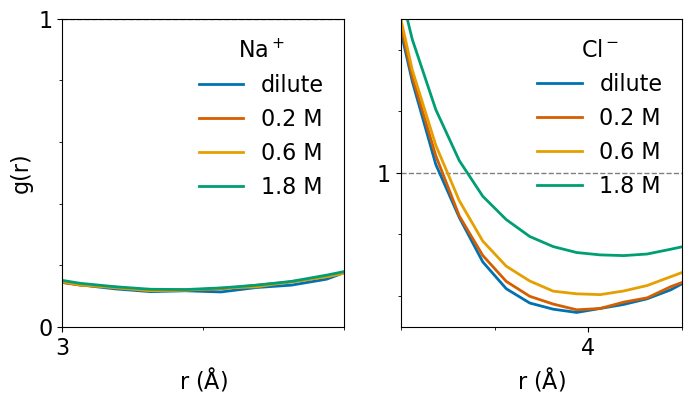

In [13]:
files = [
    './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]
labels = ['dilute', '0.2 M', '0.6 M', '1.8 M']

# Zoom in on hydration shell radius
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=False)
ax[0] = rdf_axis(ax[0], ymin=7, ymax=8, xmin=2.2, xmax=2.6)
ax[1] = rdf_axis(ax[1], ymin=3, ymax=4, xmin=3.2, xmax=3.6)

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[0].plot(rdfs[:,0], rdfs[:,1], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    ax[1].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')

ax[0].legend(title='Na$^+$', frameon=False)
ax[1].legend(title='Cl$^-$', frameon=False)
ax[1].set_ylabel(None)

# Zoom in on IOD peak
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=False)
ax[0] = rdf_axis(ax[0], ymin=0, ymax=1, xmin=3, xmax=3.4)
ax[1] = rdf_axis(ax[1], ymin=0.5, ymax=1.5, xmin=3.6, xmax=4.2)

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[0].plot(rdfs[:,0], rdfs[:,1], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    ax[1].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')

ax[0].legend(title='Na$^+$', frameon=False)
ax[1].legend(title='Cl$^-$', frameon=False)
ax[1].set_ylabel(None)

#### Na-Cl RDFs, standard MD, 1 bar, all concentrations

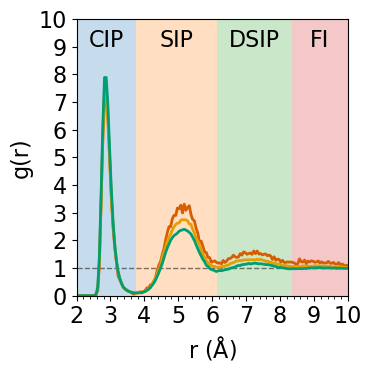

In [15]:
files = [
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]
labels = ['0.2 M', '0.6 M', '1.8 M']

vals = np.linspace(0,1,4)
cool_cm = plt.cm.cool(vals)
shades = [mcolors.to_hex(c) for c in cool_cm]

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax = rdf_axis(ax, ymax=10, yticks=(1,20))

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax.plot(rdfs[:,0], rdfs[:,4], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')

# ax.legend(title='Na$^+$ - Cl$^-$', frameon=False)

ion_pairs = {
    'CIP': (0, 3.75), 
    'SIP': (3.75, 6.15), 
    'DSIP': (6.15, 8.35), 
    'FI': (8.35, 10)
            }

le = 2
i = 0
for ip,bounds in ion_pairs.items():
    ax.fill_betweenx(np.linspace(0,10), le, bounds[1], alpha=0.25)
    ax.text((le+bounds[1]) / 2, 9, ip, ha='center')
    le = bounds[1]
    i += 1

ax.set_xlim(2,10)
plt.tight_layout()
plt.savefig('rdf_NaCl_ion-ion_concentration_pairing.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


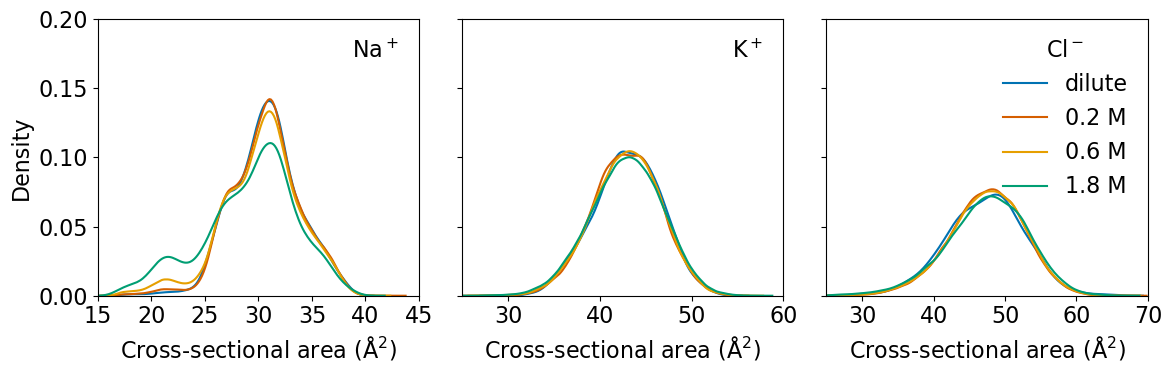

In [16]:
files = [
    './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/'
]
labels = ['dilute', '0.2 M', '0.6 M', '1.8 M']

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)

for i,f in enumerate(files):

    file_Na = f+'polyhedrons_Na.pl'
    file_Cl = f+'polyhedrons_Cl.pl'
    df = prep_polyhedron_df(file_Na, file_Cl)

    sns.kdeplot(df[df.ion == 'Na'], x='area', ax=ax[0], color=concentration_colors[labels[i]])
    sns.kdeplot(df[df.ion == 'Cl'], x='area', ax=ax[2], label=labels[i], color=concentration_colors[labels[i]])

files = [
    './KCl/OPC3/Sengupta_etal/Cdilute/P1bar/',
    './KCl/OPC3/Sengupta_etal/C0.2M/P1bar/',
    './KCl/OPC3/Sengupta_etal/C0.6M/P1bar/',
    './KCl/OPC3/Sengupta_etal/C1.8M/P1bar/'
]

for i,f in enumerate(files):

    file = f+'polyhedrons.pl'
    df = polyhedron_df(file)
    sns.kdeplot(df, x='area', ax=ax[1], color=concentration_colors[labels[i]])

ax[0].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[0].set_xticks(np.arange(100,step=5))
ax[0].set_xlim(15,45)
ax[0].set_yticks(np.arange(0.5,step=0.05))
ax[0].set_ylim(0,0.2)
ax[0].legend(frameon=False, title='Na$^+$')

ax[1].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1].set_xticks(np.arange(100,step=10))
ax[1].set_xlim(25,60)
ax[1].legend(frameon=False, title='K$^+$')

ax[2].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[2].set_xticks(np.arange(100,step=10))
ax[2].set_xlim(25,70)
ax[2].legend(frameon=False, title='Cl$^-$', loc='upper right')

plt.tight_layout()
plt.savefig(figs_path+'area_dist_Na_K_Cl_concentration.pdf')

#### Combined RDFs and area distributions, comparing concentration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/c7/911byk5d5jl0vp7m92bxn01w0000gn/T/ipykernel_91489/4034939817.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


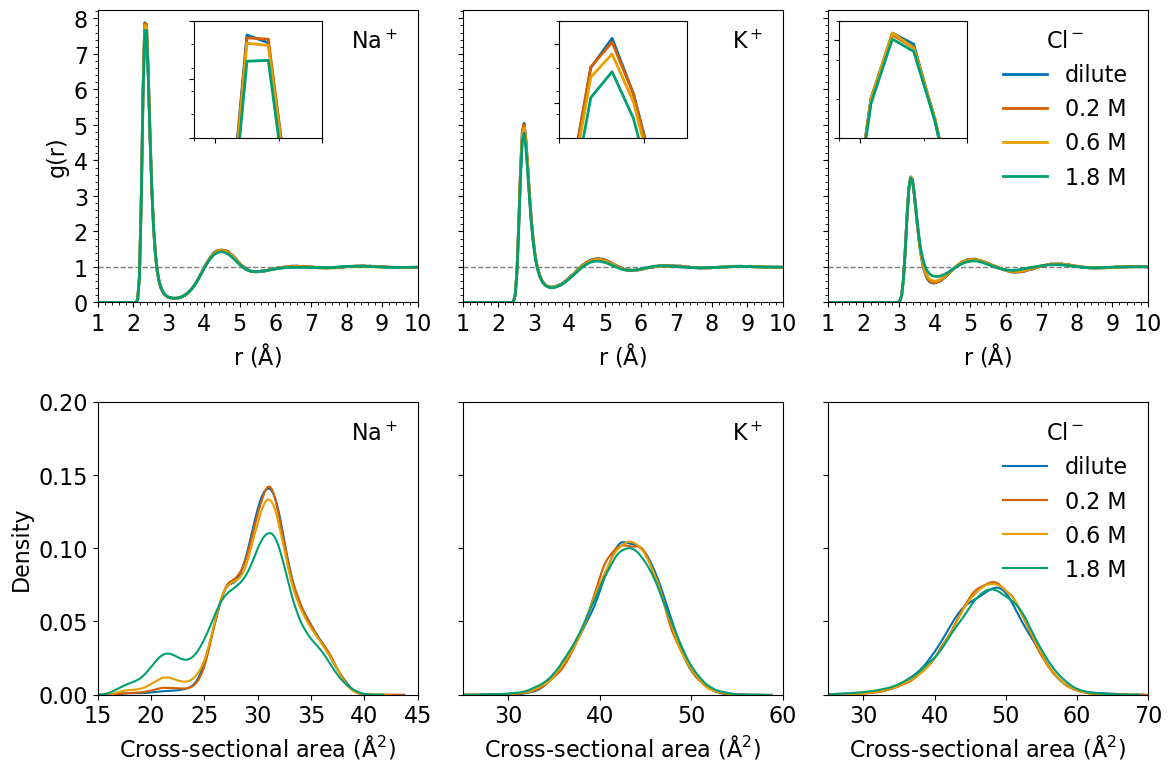

In [17]:
files = [
    './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]
labels = ['dilute', '0.2 M', '0.6 M', '1.8 M']

fig, ax = plt.subplots(2,3, figsize=(12,8))

axins = []
for i in range(2):
    ax[0,i] = rdf_axis(ax[0,i], ymax=8.25, xmax=10)

    # Create inset of width 30% and height 40% of the parent Axes' bounding box
    # at the lower left corner.
    axins.append(inset_axes(ax[0,i], width='40%', height='40%', loc='upper center'))
    axins[i].tick_params(labelleft=False, labelbottom=False)
    axins[i].set_xticks(np.arange(50, step=0.2), minor=True)
    axins[i].set_yticks(np.arange(50, step=0.2), minor=True)


ax[0,2] = rdf_axis(ax[0,2], ymax=8.25, xmax=10)
# Create inset of width 30% and height 40% of the parent Axes' bounding box
# at the lower left corner.
axins.append(inset_axes(ax[0,2], width='40%', height='40%', loc='upper left'))
axins[2].tick_params(labelleft=False, labelbottom=False)
axins[2].set_xticks(np.arange(50, step=0.2), minor=True)
axins[2].set_yticks(np.arange(50, step=0.2), minor=True)

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[0,0].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[0].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[0].set_xlim(2.2,2.5)
    axins[0].set_ylim(7,8)    

    ax[0,2].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[2].plot(rdfs[:,0], rdfs[:,2], label=labels[i], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[2].set_xlim(3.2,3.5)
    axins[2].set_ylim(3,3.6)

ax[0,0].legend(title='Na$^+$', frameon=False, loc='upper right')
ax[0,2].legend(title='Cl$^-$', frameon=False, loc='upper right')
ax[0,2].set_ylabel(None)
ax[0,2].tick_params(labelleft=False)

files = [
    './KCl/OPC3/Sengupta_etal/Cdilute/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C0.2M/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C0.6M/P1bar/rdfs.dat',
    './KCl/OPC3/Sengupta_etal/C1.8M/P1bar/rdfs.dat'
]

for i,f in enumerate(files):
    
    rdfs = np.loadtxt(f)
    
    ax[0,1].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[1].plot(rdfs[:,0], rdfs[:,1], color=concentration_colors[labels[i]], lw=2, ls='solid')
    axins[1].set_xlim(2.6,2.9)
    axins[1].set_ylim(4.2,5.2)

ax[0,1].legend(title='K$^+$', frameon=False)
ax[0,1].set_ylabel(None)
ax[0,1].tick_params(labelleft=False)

# Now, polyhedron area distributions

files = [
    './NaCl/OPC3/Sengupta_etal/Cdilute/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C0.2M/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C0.6M/P1bar/',
    './NaCl/OPC3/Sengupta_etal/C1.8M/P1bar/'
]
labels = ['dilute', '0.2 M', '0.6 M', '1.8 M']

for i,f in enumerate(files):

    file_Na = f+'polyhedrons_Na.pl'
    file_Cl = f+'polyhedrons_Cl.pl'
    df = prep_polyhedron_df(file_Na, file_Cl)

    sns.kdeplot(df[df.ion == 'Na'], x='area', ax=ax[1,0], color=concentration_colors[labels[i]])
    sns.kdeplot(df[df.ion == 'Cl'], x='area', ax=ax[1,2], label=labels[i], color=concentration_colors[labels[i]])

files = [
    './KCl/OPC3/Sengupta_etal/Cdilute/P1bar/',
    './KCl/OPC3/Sengupta_etal/C0.2M/P1bar/',
    './KCl/OPC3/Sengupta_etal/C0.6M/P1bar/',
    './KCl/OPC3/Sengupta_etal/C1.8M/P1bar/'
]

for i,f in enumerate(files):

    file = f+'polyhedrons.pl'
    df = polyhedron_df(file)
    sns.kdeplot(df, x='area', ax=ax[1,1], color=concentration_colors[labels[i]])

for i in range(3):
    ax[1,i].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
    ax[1,i].set_yticks(np.arange(0.5,step=0.05))
    ax[1,i].set_ylim(0,0.2)

ax[1,0].set_xticks(np.arange(100,step=5))
ax[1,0].set_xlim(15,45)
ax[1,0].legend(frameon=False, title='Na$^+$')

ax[1,1].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1,1].set_xticks(np.arange(100,step=10))
ax[1,1].set_xlim(25,60)
ax[1,1].legend(frameon=False, title='K$^+$')
ax[1,1].tick_params(labelleft=False)
ax[1,1].set_ylabel(None)

ax[1,2].set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
ax[1,2].set_xticks(np.arange(100,step=10))
ax[1,2].set_xlim(25,70)
ax[1,2].legend(frameon=False, title='Cl$^-$', loc='upper right')
ax[1,2].tick_params(labelleft=False)
ax[1,2].set_ylabel(None)

plt.tight_layout()
plt.savefig(figs_path+'rdf_area_dist_Na_K_Cl_concentration.pdf')

In [22]:
c = '0.2 M'
c.replace(' ', '')

'0.2M'

### Many ions comparing concentrations

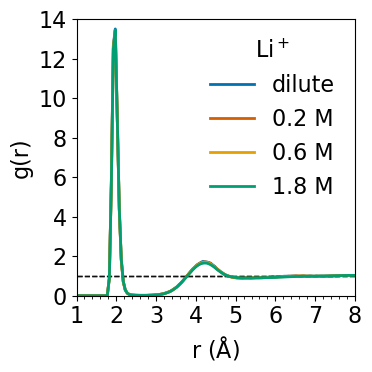

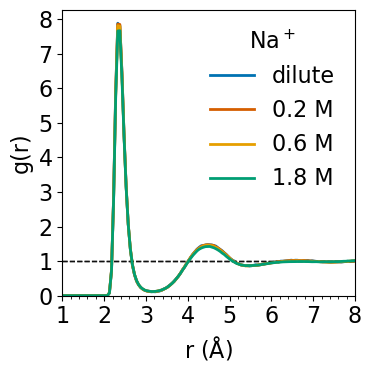

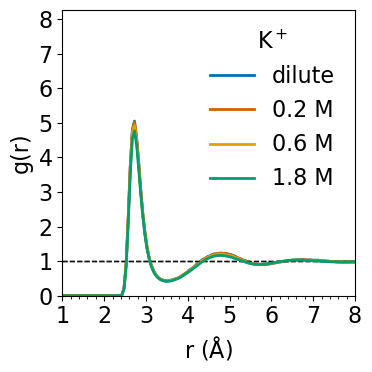

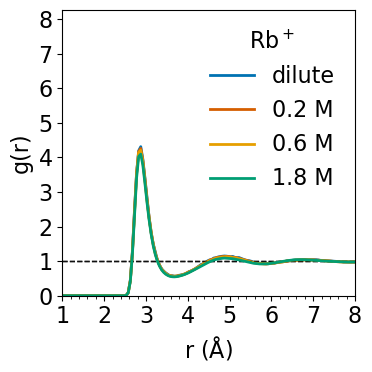

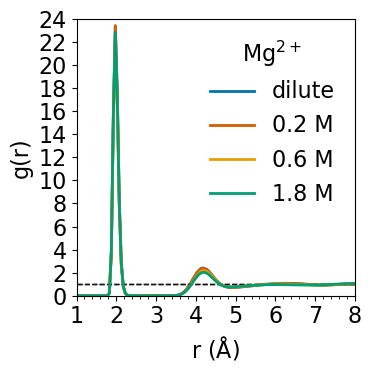

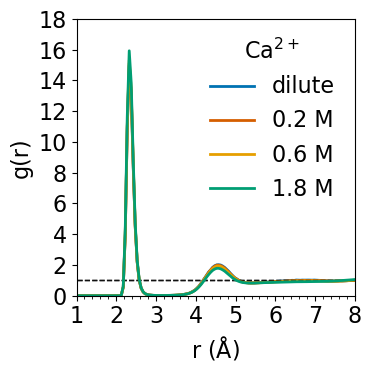

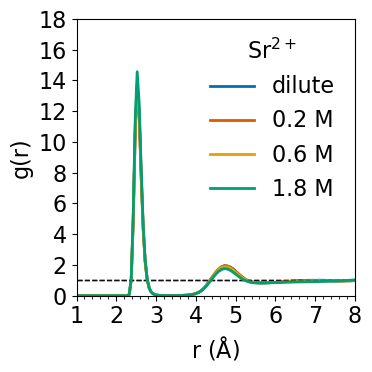

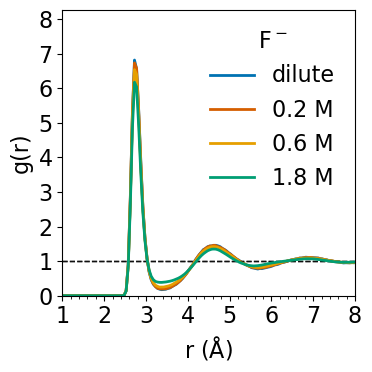

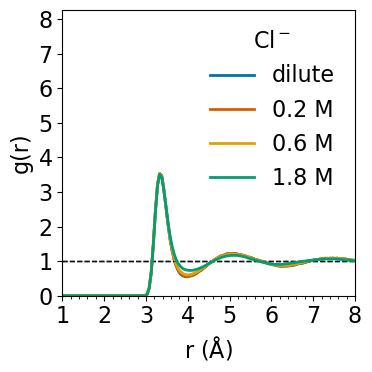

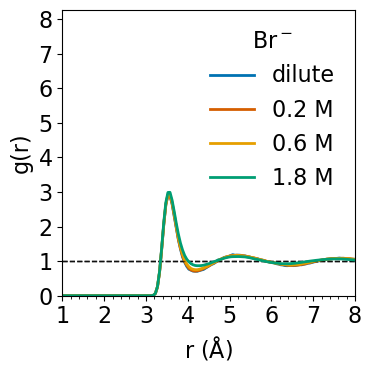

In [26]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './KCl/OPC3/Sengupta_etal/',
    './RbCl/OPC3/Sengupta_etal/',
    './MgCl2/OPC3/Li2020/',
    './CaCl2/OPC3/Li2020/',
    './SrCl2/OPC3/Li2020/',
    './NaF/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './NaBr/OPC3/Sengupta_etal/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']

concentrations = ['dilute', '0.2 M', '0.6 M', '1.8 M']


for i,path in enumerate(ion_paths):

    fig, ax = plt.subplots(1,1, figsize=(4,4))

    for conc in concentrations:
        file = path+f"C{conc.replace(' ','')}/P1bar/rdfs.dat"
        rdfs = np.loadtxt(file)

        if 'LiCl' in path:
            ymax = 14
            yticks = (2,100)
        elif 'MgCl2' in path:
            ymax = 24
            yticks = (2,100)
        elif 'CaCl2' in path or 'SrCl2' in path:
            ymax = 18
            yticks = (2,100)
        else:
            ymax = 8.25
            yticks = (1,100)

        if i > 6:
            r = 2
        else:
            r = 1

        ax = rdf_axis(ax, ymax=ymax, yticks=yticks)
        ax.plot(rdfs[:,0], rdfs[:,r], label=conc, color=concentration_colors[conc], lw=2, ls='solid')
        ax.legend(title=labels[i], frameon=False)

        ion = labels[i].split('$')[0]
        plt.tight_layout()
        plt.savefig(si_figs_path+f'rdf_{ion}_concentration.pdf')



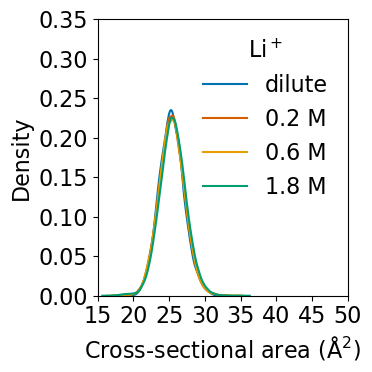

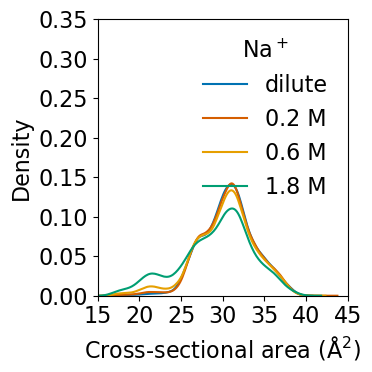

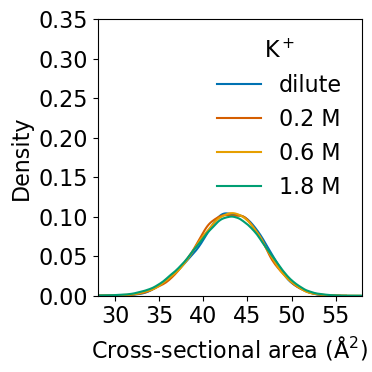

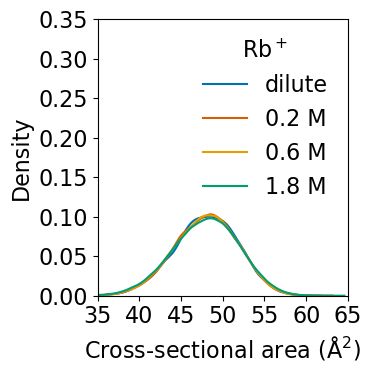

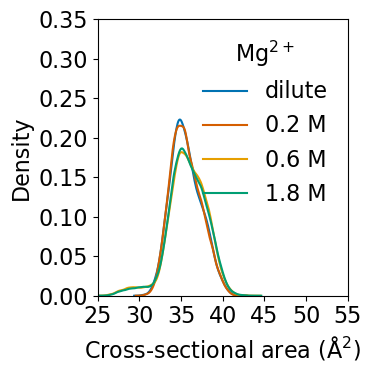

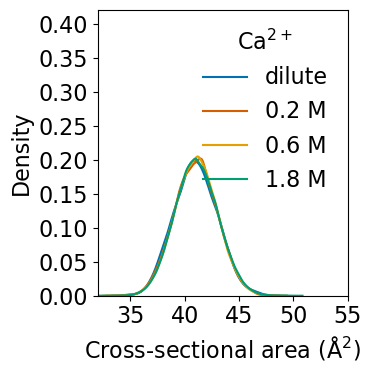

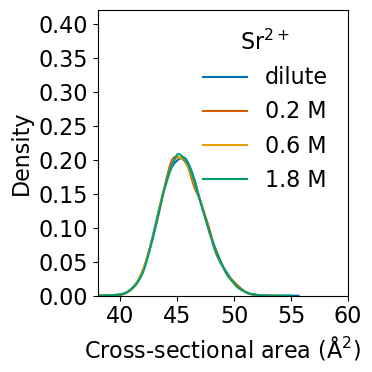

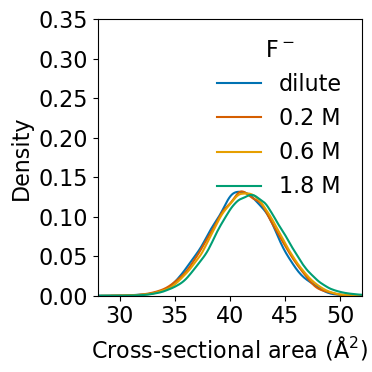

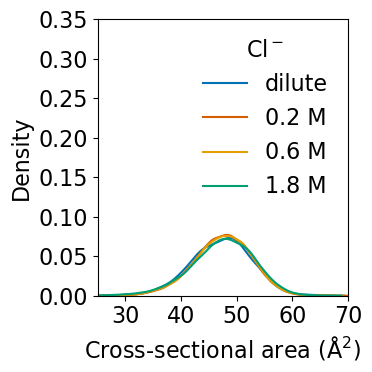

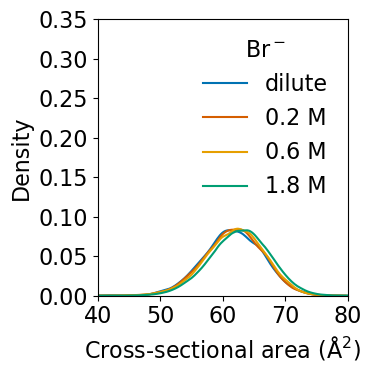

In [27]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './KCl/OPC3/Sengupta_etal/',
    './RbCl/OPC3/Sengupta_etal/',
    './MgCl2/OPC3/Li2020/',
    './CaCl2/OPC3/Li2020/',
    './SrCl2/OPC3/Li2020/',
    './NaF/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './NaBr/OPC3/Sengupta_etal/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']
ranges = [(15,50), (15,45), (28,58), (35,65),
          (25,55), (32,55), (38,60),
          (28,52), (25,70), (40,80)]

concentrations = ['dilute', '0.2 M', '0.6 M', '1.8 M']

for i,path in enumerate(ion_paths):

    ion = labels[i].split('$')[0]

    if ion in ['Na', 'Cl']:
        add = f'_{ion}'
    else:
        add = ''

    if ion in ['Ca', 'Sr']:
        ub = 0.42
        yticks = 0.05
    else:
        ub = 0.35
        yticks = 0.05

    if ion in ['Cl', 'Br']:
        xticks = 10
    else:
        xticks = 5

    fig, ax = plt.subplots(1,1, figsize=(4,4))

    for conc in concentrations:
        file = path+f"C{conc.replace(' ','')}/P1bar/polyhedrons{add}.pl"
        df = polyhedron_df(file)
    
        sns.kdeplot(df, x='area', ax=ax, label=conc, color=concentration_colors[conc])


    ax.set_xlabel('Cross-sectional area ($\mathrm{\AA}^2$)')
    ax.set_xticks(np.arange(100,step=xticks))
    ax.set_xlim(ranges[i])
    ax.set_yticks(np.arange(0.5,step=yticks))
    ax.set_ylim(0,ub)
    ax.legend(frameon=False, title=labels[i], loc='upper right')

    plt.tight_layout()
    plt.savefig(si_figs_path+f'area_dist_{ion}_concentration.pdf')

#### Now, looking at volume distributions

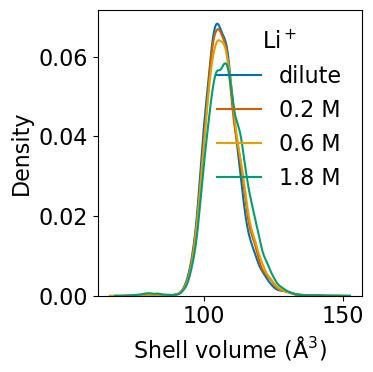

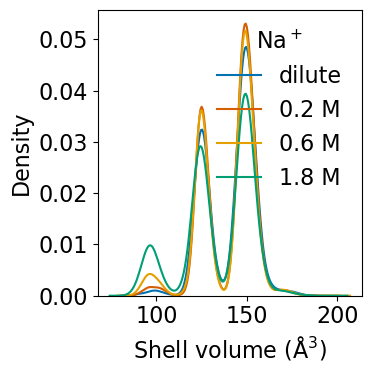

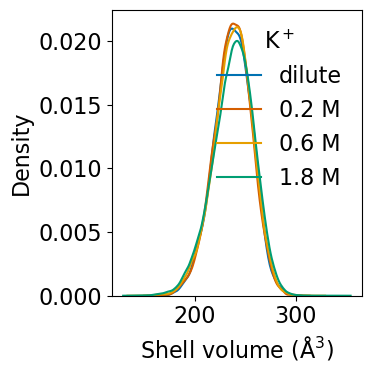

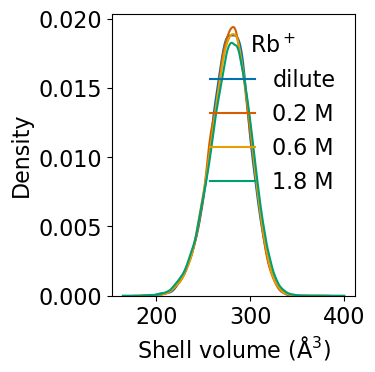

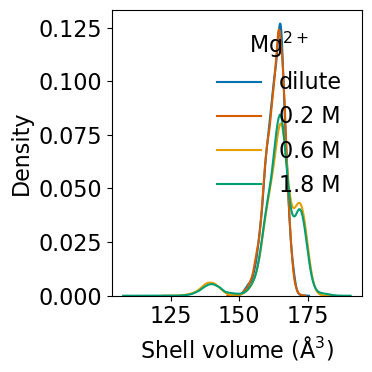

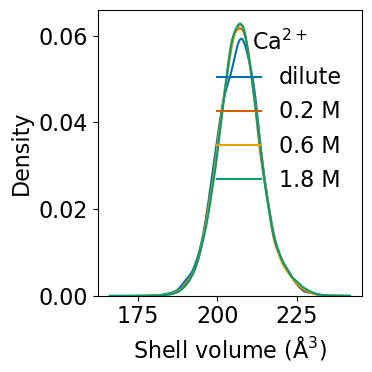

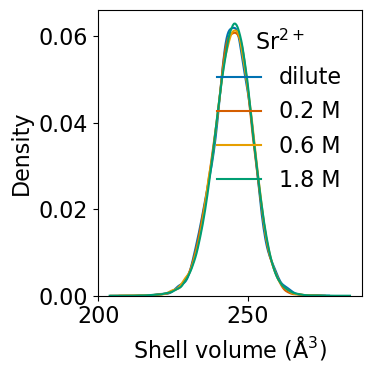

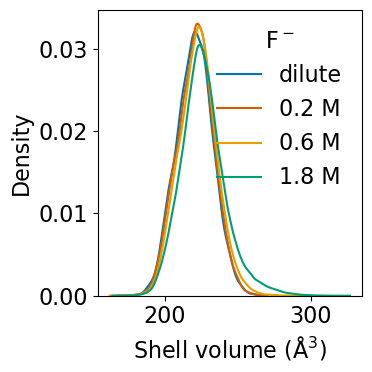

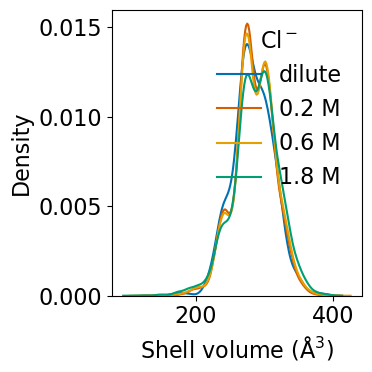

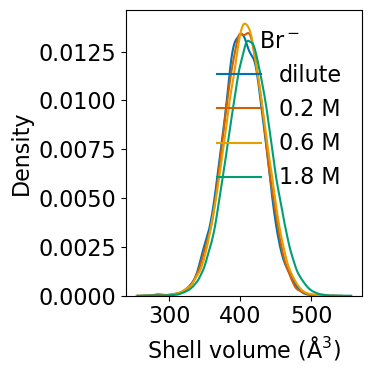

In [29]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './KCl/OPC3/Sengupta_etal/',
    './RbCl/OPC3/Sengupta_etal/',
    './MgCl2/OPC3/Li2020/',
    './CaCl2/OPC3/Li2020/',
    './SrCl2/OPC3/Li2020/',
    './NaF/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './NaBr/OPC3/Sengupta_etal/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']
# ranges = [(15,50), (15,45), (28,58), (35,65),
#           (25,55), (32,55), (38,60),
#           (28,52), (25,70), (40,80)]

concentrations = ['dilute', '0.2 M', '0.6 M', '1.8 M']

for i,path in enumerate(ion_paths):

    ion = labels[i].split('$')[0]

    if ion in ['Na', 'Cl']:
        add = f'_{ion}'
    else:
        add = ''

    # if ion in ['Ca', 'Sr']:
    #     ub = 0.42
    #     yticks = 0.05
    # else:
    #     ub = 0.35
    #     yticks = 0.05

    # if ion in ['Cl', 'Br']:
    #     xticks = 10
    # else:
    #     xticks = 5

    fig, ax = plt.subplots(1,1, figsize=(4,4))

    for conc in concentrations:
        file = path+f"C{conc.replace(' ', '')}/P1bar/polyhedrons{add}.pl"
        df = polyhedron_df(file)
    
        sns.kdeplot(df, x='volume', ax=ax, label=conc, color=concentration_colors[conc])


    ax.set_xlabel('Shell volume ($\mathrm{\AA}^3$)')
    # ax.set_xticks(np.arange(100,step=xticks))
    # ax.set_xlim(ranges[i])
    # ax.set_yticks(np.arange(0.5,step=yticks))
    # ax.set_ylim(0,ub)
    ax.legend(frameon=False, title=labels[i], loc='upper right')

    plt.tight_layout()
    # plt.savefig(si_figs_path+f'volume_dist_{ion}_concentration.pdf')

In [32]:
ion_paths = [
    './LiCl/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './KCl/OPC3/Sengupta_etal/',
    './RbCl/OPC3/Sengupta_etal/',
    './MgCl2/OPC3/Li2020/',
    './CaCl2/OPC3/Li2020/',
    './SrCl2/OPC3/Li2020/',
    './NaF/OPC3/Sengupta_etal/',
    './NaCl/OPC3/Sengupta_etal/',
    './NaBr/OPC3/Sengupta_etal/',
]
labels = ['Li$^+$', 'Na$^+$', 'K$^+$', 'Rb$^+$',
          'Mg$^{2+}$', 'Ca$^{2+}$', 'Sr$^{2+}$',
          'F$^-$', 'Cl$^-$', 'Br$^-$']

concentrations = ['dilute', '0.2 M', '0.6 M', '1.8 M']

cols = {
    'ion' : [],
    'concentration' : [],
    'ion-O distance' : [],
    'ion-O height' : [],
    'hydration shell' : []
}

for i,path in enumerate(ion_paths):

    for conc in concentrations:
        file = path+f"C{conc.replace(' ', '')}/P1bar/rdfs.dat"
        rdfs = np.loadtxt(file)

        if i > 6:
            idx = 2
        else:
            idx = 1

        r = rdfs[:,0]
        rdf = rdfs[:,idx]

        peaks,_ = find_peaks(rdf, distance=5)
        mins,_ = find_peaks(-rdf, distance=5)
        ion = labels[i].split('$')[0]

        cols['ion'].append(ion)
        cols['ion-O distance'].append(r[peaks[0]])
        cols['ion-O height'].append(rdf[peaks[0]])
        cols['hydration shell'].append(r[mins[0]])
        cols['concentration'].append(conc)


df = pd.DataFrame(cols)
df

,ion,concentration,ion-O distance,ion-O height,hydration shell
0,Li,dilute,1.975,13.497891,2.575
1,Li,0.2 M,1.975,13.433538,2.625
2,Li,0.6 M,1.975,13.417626,2.625
3,Li,1.8 M,1.975,13.442358,2.675
4,Na,dilute,2.325,7.877241,3.225
5,Na,0.2 M,2.325,7.852575,3.125
6,Na,0.6 M,2.325,7.806452,3.125
7,Na,1.8 M,2.375,7.660803,3.175
8,K,dilute,2.725,5.048941,3.525
9,K,0.2 M,2.725,5.015568,3.475
